In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/pushp-2401/IME672/main/train.csv'
training = pd.read_csv(url)
training.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
training.info()
training.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

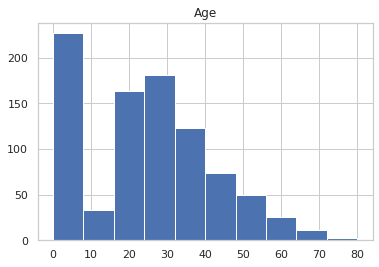

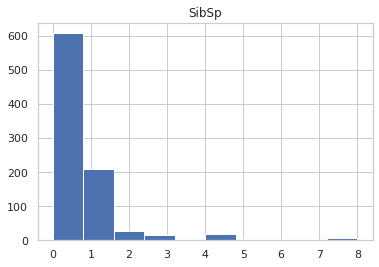

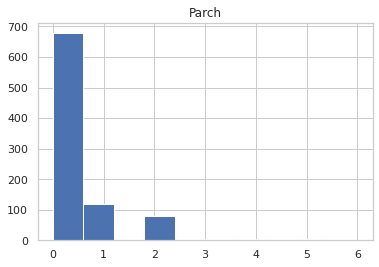

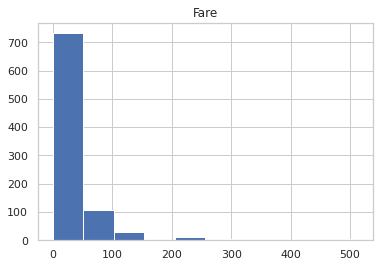

In [ ]:
numerical = training[['Age','SibSp','Parch','Fare']]
categorical= training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
for i in numerical.columns:
    plt.hist(numerical[i])
    plt.title(i)
    plt.show()



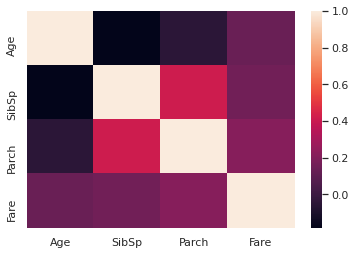

In [ ]:
sns.heatmap(numerical.corr())

In [ ]:
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


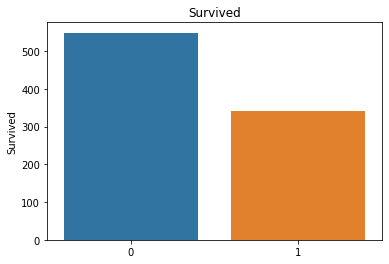

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


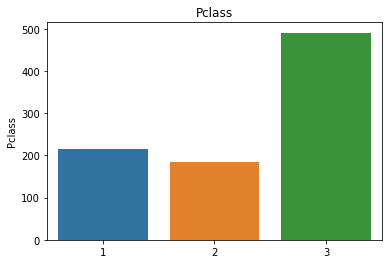

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


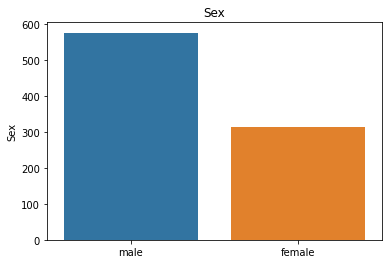

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


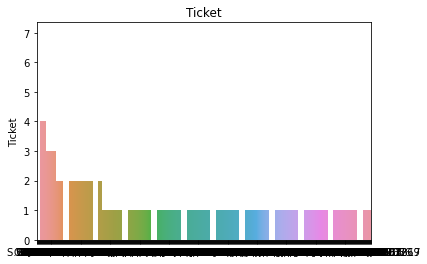

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


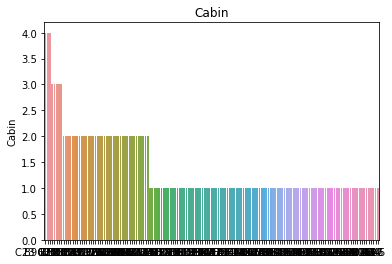

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


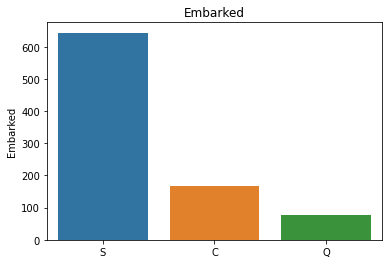

In [ ]:
for i in categorical.columns:
    sns.barplot(categorical[i].value_counts().index,categorical[i].value_counts()).set_title(i)
    plt.show()

In [ ]:
training['Embarked'].fillna('Unknown',inplace=True)
training['Age'].fillna(0, inplace=True)
rep = {0: "Dead", 1: "Survived"}
training.replace({'Survived' : rep}, inplace=True)
training.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1      Dead       3  ...   7.2500   NaN         S
1            2  Survived       1  ...  71.2833   C85         C
2            3  Survived       3  ...   7.9250   NaN         S
3            4  Survived       1  ...  53.1000  C123         S
4            5      Dead       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
training['type'] = training.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
training['type'].fillna('Title_UK', inplace=True)


In [ ]:
training['Age'].fillna(0, inplace=True)
training['age_bins'] = pd.cut(x=training['Age'], bins=[1, 10, 20, 50, 100])
training['age_bins'] = training['age_bins'].apply(lambda x: x.fillna(x.value_counts().index[0]))
training['age_bins'].unique()
training['age_cat'] = pd.cut(x=training['Age'], bins=[1, 10, 20, 50, 100], labels=[ "Child", "Teen", "Adult", "Old"])
training.head()

PassengerId  Survived  Pclass  ...   type  age_bins  age_cat
0            1      Dead       3  ...    Mr.  (20, 50]    Adult
1            2  Survived       1  ...   Mrs.  (20, 50]    Adult
2            3  Survived       3  ...  Miss.  (20, 50]    Adult
3            4  Survived       1  ...   Mrs.  (20, 50]    Adult
4            5      Dead       3  ...    Mr.  (20, 50]    Adult

[5 rows x 15 columns]

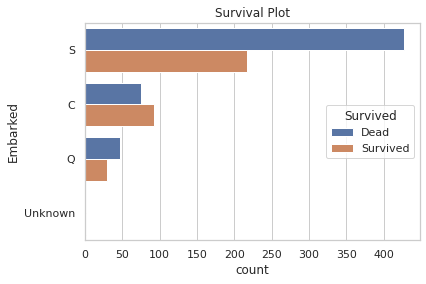

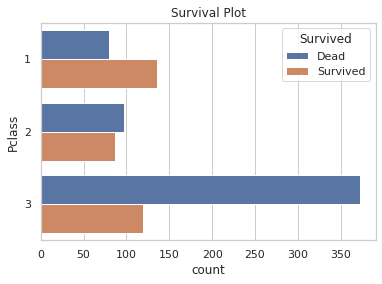

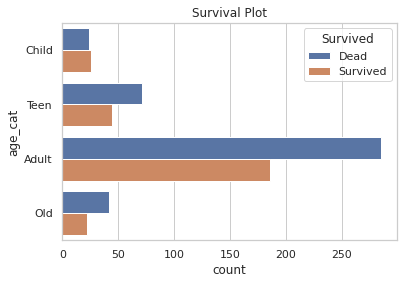

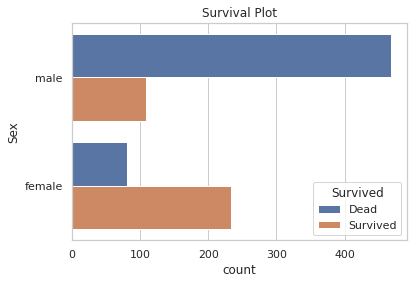

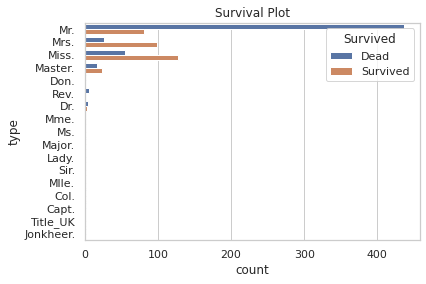

In [ ]:
for x in ['Embarked', 'Pclass','age_cat', 'Sex', 'type']:
    sns.set(style="whitegrid")
    ax = sns.countplot(y=x, hue="Survived", data=training)
    plt.ylabel(x)
    plt.title('Survival Plot')
    plt.show()



In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=0abd3db9f7019acdf549d0b316a889ab5d3d70374d8913b9488df67d01b30aa6
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from apyori import apriori

In [ ]:
nominal_cols = ['Embarked','Pclass','age_cat', 'Survived', 'Sex']
cat_cols = ['Embarked','Pclass','age_cat', 'Survived', 'type']
in_titanic = training[nominal_cols]
cat_titanic = training[cat_cols]
dataset = []
for i in range(0, in_titanic.shape[0]-1):
    dataset.append([str(in_titanic.values[i,j]) for j in range(0, in_titanic.shape[1])])
# dataset = in_titanic.to_xarray()
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()



1      2      3  Adult      C  ...   Teen  Unknown  female   male    nan
0  False  False   True   True  False  ...  False    False   False   True  False
1   True  False  False   True   True  ...  False    False    True  False  False
2  False  False   True   True  False  ...  False    False    True  False  False
3   True  False  False   True  False  ...  False    False    True  False  False
4  False  False   True   True  False  ...  False    False   False   True  False

[5 rows x 16 columns]

In [ ]:
oht.columns_

['1',
 '2',
 '3',
 'Adult',
 'C',
 'Child',
 'Dead',
 'Old',
 'Q',
 'S',
 'Survived',
 'Teen',
 'Unknown',
 'female',
 'male',
 'nan']

In [ ]:
url = 'https://raw.githubusercontent.com/pushp-2401/IME672/main/x.csv'
trainingg = pd.read_csv(url, header = None)
trainingg = trainingg.drop(0, axis = 1)
trainingg.head()

1      2      3      4      5   ...     12       13      14     15     16
0      1      2      3  Adult      C  ...   Teen  Unknown  female   male    NaN
1  False  False   True   True  False  ...  False    False   False   True  False
2   True  False  False   True   True  ...  False    False    True  False  False
3  False  False   True   True  False  ...  False    False    True  False  False
4   True  False  False   True  False  ...  False    False    True  False  False

[5 rows x 16 columns]

In [ ]:
print(trainingg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       891 non-null    object
 1   2       891 non-null    object
 2   3       891 non-null    object
 3   4       891 non-null    object
 4   5       891 non-null    object
 5   6       891 non-null    object
 6   7       891 non-null    object
 7   8       891 non-null    object
 8   9       891 non-null    object
 9   10      891 non-null    object
 10  11      891 non-null    object
 11  12      891 non-null    object
 12  13      891 non-null    object
 13  14      891 non-null    object
 14  15      891 non-null    object
 15  16      890 non-null    object
dtypes: object(16)
memory usage: 111.5+ KB
None


In [ ]:
records = []
for i in range(0, 890):
    records.append([str(df.values[i,j]) for j in range(0, 16)])  

In [ ]:
association_rules = apriori(df, min_support=0.02, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [ ]:
print(len(association_results))

222


In [ ]:
for item in association_results:
    print (item)

RelationRecord(items=frozenset({'d', 'A'}), support=0.0625, ordered_statistics=[OrderedStatistic(items_base=frozenset({'A'}), items_add=frozenset({'d'}), confidence=1.0, lift=3.2), OrderedStatistic(items_base=frozenset({'d'}), items_add=frozenset({'A'}), confidence=0.2, lift=3.2)])
RelationRecord(items=frozenset({'l', 'A'}), support=0.0625, ordered_statistics=[OrderedStatistic(items_base=frozenset({'A'}), items_add=frozenset({'l'}), confidence=1.0, lift=3.2), OrderedStatistic(items_base=frozenset({'l'}), items_add=frozenset({'A'}), confidence=0.2, lift=3.2)])
RelationRecord(items=frozenset({'t', 'A'}), support=0.0625, ordered_statistics=[OrderedStatistic(items_base=frozenset({'A'}), items_add=frozenset({'t'}), confidence=1.0, lift=16.0), OrderedStatistic(items_base=frozenset({'t'}), items_add=frozenset({'A'}), confidence=1.0, lift=16.0)])
RelationRecord(items=frozenset({'u', 'A'}), support=0.0625, ordered_statistics=[OrderedStatistic(items_base=frozenset({'A'}), items_add=frozenset({'u